In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('spam.csv',encoding='latin_1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"sms"})
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print(len(df))

5572


In [5]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
df['length']=df['sms'].apply(len)

In [7]:
df.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

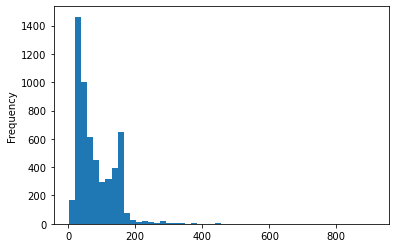

In [8]:
df['length'].plot(bins=50,kind='hist')

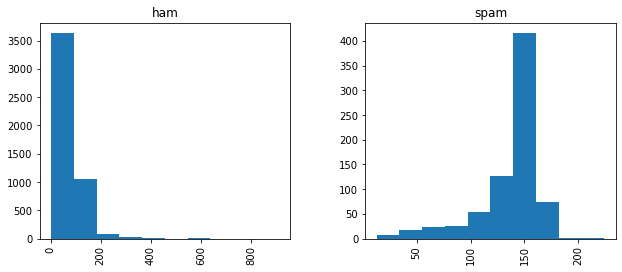

In [9]:
df.hist(column='length',by='label',figsize=(10,4));

In [10]:
df.loc[0:,'label']=df.label.map({'spam':1,'ham':0})
print(df.shape)
df.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['sms'],df['label'],test_size=0.2,random_state=1)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()

In [13]:
train_data=count_vect.fit_transform(x_train)
test_data=count_vect.transform(x_test)

In [14]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB()
naive_bayes.fit(train_data,y_train)
MultinomialNB(alpha=1.0,class_prior=None,fit_prior=True)
prediction=naive_bayes.predict(test_data)

In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("acuuracy score:{}".format(accuracy_score(y_test,prediction)))
print("precision score:{}".format(precision_score(y_test,prediction)))
print("recall score:{}".format(recall_score(y_test,prediction)))
print("f1 score:{}".format(f1_score(y_test,prediction)))

acuuracy score:0.9847533632286996
precision score:0.9420289855072463
recall score:0.935251798561151
f1 score:0.9386281588447652
